**Q1. Predict the price of the Uber ride from a given pickup point to the agreed drop-off location. Perform following tasks: <br>**

1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and random forest regression models.
5. Evaluate the models and compare their respective scores like R2, RMSE, etc. Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# Pre-processing

In [11]:
df = pd.read_csv("uber.csv")

In [12]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


### Drop unnecessary features

In [13]:
df = df.drop(['Unnamed: 0','key','pickup_datetime'], axis=1)

In [14]:
df.isnull().any()

fare_amount          False
pickup_longitude     False
pickup_latitude      False
dropoff_longitude     True
dropoff_latitude      True
passenger_count      False
dtype: bool

In [15]:
df = df.dropna()

In [16]:
df.isnull().any()

fare_amount          False
pickup_longitude     False
pickup_latitude      False
dropoff_longitude    False
dropoff_latitude     False
passenger_count      False
dtype: bool

### Calculate euclidean distance and add to df

In [17]:
# function to calc distance
import math

def euclideanDistance(long1, lat1, long2, lat2):
    lat_dist = abs(lat2 - lat1)
    long_dist = abs(long2 - long1)
    distance = math.sqrt(lat_dist**2 + long_dist**2)
    return distance

df["distance"] = df.apply(lambda row: euclideanDistance(row['pickup_longitude'], row['pickup_latitude'], row['dropoff_longitude'], row['dropoff_latitude']), axis=1)

In [18]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,0.015140
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,0.022103
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,0.053109
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,0.016528
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,0.051031


### Identify and remove outliers

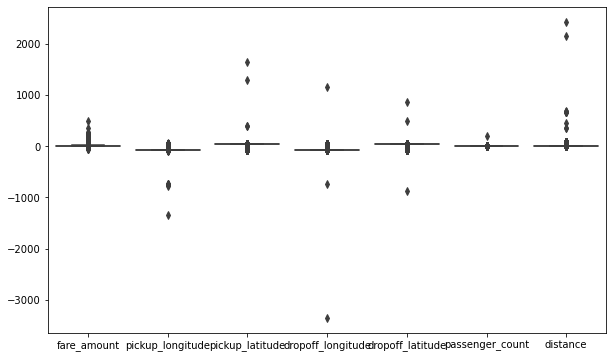

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)  # Set figure size directly during boxplot creation
plt.show()

In [20]:
for col in df.columns:
    Q1 = df[col].quantile(0.25)  # 25th percentile
    Q3 = df[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1                # Interquartile Range
    
    # Define acceptable range for non-outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Keep the values between lower and upper bound in the df, filter out rest
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


### Correlation Matrix

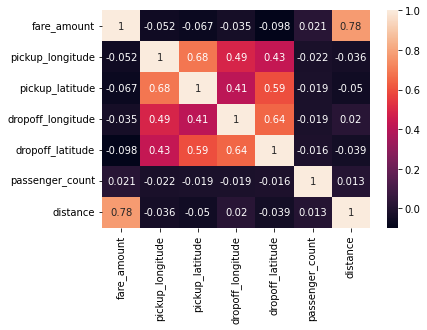

In [24]:
corr = df.corr()
sns.heatmap(corr, annot = True)
plt.show()

### Train-Test split & Scaling

In [75]:
x = df.drop(['fare_amount', 'passenger_count'], axis=1)
y = df['fare_amount']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [76]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Linear Regression

In [77]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)

In [78]:
y_pred

array([ 6.52376721,  8.7068882 ,  4.58782856, ...,  5.47287628,
        6.2340316 , 11.96930079])

### Metrics

In [79]:
r2score = r2_score(y_test, y_pred)
print("R2 Score: ", r2score)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ",rmse)
mae = mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("MAPE: ", mape)

R2 Score:  0.6074450931869311
RMSE:  2.2150812930675094
MAE:  1.581516876046124
MAPE:  0.19955158250932675


### Random Forest Regression

In [80]:
model1 = RandomForestRegressor()
model1.fit(x_train_scaled, y_train)

RandomForestRegressor()

In [81]:
y_pred = model1.predict(x_test_scaled)
y_pred

array([ 5.881,  7.827,  4.73 , ...,  4.581,  5.63 , 11.827])

### Metrics

In [82]:
r2score = r2_score(y_test, y_pred)
print("R2 Score: ", r2score)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ",rmse)
mae = mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("MAPE: ", mape)

R2 Score:  0.6507477012792579
RMSE:  2.089339913593336
MAE:  1.4728312648391755
MAPE:  0.18653195068507097
